In [140]:
# basic
import os
import pandas as pd

# visualization
import matplotlib.pyplot as plt
import seaborn as sns   

# preprocessing and modeling
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from scipy.stats import zscore

In [123]:
data_folder = r"/home/topias/DS/Intro-to-ML/Project/Data"

file_list = os.listdir(data_folder)


for file_name in file_list:
    print(file_name)

sample_submission = pd.read_csv(data_folder + "/sample_submission.csv")
train = pd.read_csv(data_folder + "/train.csv")

print("Shape of the training data:")
print(train.shape)

test = pd.read_csv(data_folder + "/test.csv")

train.csv
sample_submission.csv
test.csv
Shape of the training data:
(27147, 27)


In [92]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27147 entries, 0 to 27146
Data columns (total 27 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Id                            27147 non-null  int64  
 1   MW                            27147 non-null  float64
 2   NumOfAtoms                    27147 non-null  int64  
 3   NumOfC                        27147 non-null  int64  
 4   NumOfO                        27147 non-null  int64  
 5   NumOfN                        27147 non-null  int64  
 6   NumHBondDonors                27147 non-null  int64  
 7   NumOfConf                     27147 non-null  int64  
 8   NumOfConfUsed                 27147 non-null  int64  
 9   parentspecies                 26941 non-null  object 
 10  C.C..non.aromatic.            27147 non-null  int64  
 11  C.C.C.O.in.non.aromatic.ring  27147 non-null  int64  
 12  hydroxyl..alkyl.              27147 non-null  int64  
 13  a

In [93]:
print(sample_submission.head())


        Id    target
0  1000001 -4.527126
1  1000002 -4.037967
2  1000003 -5.513566
3  1000004 -1.227686
4  1000005 -2.683704


In [94]:
#print(train.describe())
print('')
print(train.head())
print('')
#print(train.columns)

missing_values = train.isnull().sum()
print(missing_values[missing_values > 0])


   Id          MW  NumOfAtoms  NumOfC  NumOfO  NumOfN  NumHBondDonors  \
0   0   30.010565           4       1       1       0               0   
1   1   74.995643           6       1       3       1               0   
2   2  102.990558           8       2       4       1               0   
3   3  118.985472           9       2       5       1               1   
4   4  134.980387          10       2       6       1               1   

   NumOfConf  NumOfConfUsed        parentspecies  ...  ether..alicyclic.  \
0          1              1  apin_decane_toluene  ...                  0   
1          1              1              toluene  ...                  0   
2          2              2              toluene  ...                  0   
3          3              1              toluene  ...                  0   
4          3              3              toluene  ...                  0   

   nitrate  nitro  aromatic.hydroxyl  carbonylperoxynitrate  peroxide  \
0        0      0             

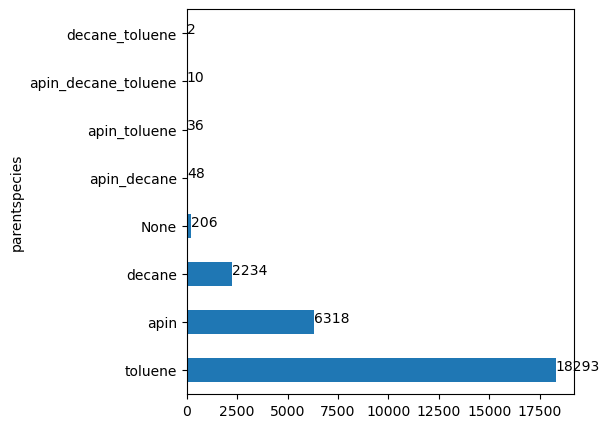

In [124]:
# Fill null values with 'None'
train['parentspecies'] = train['parentspecies'].fillna('None')

counts = train['parentspecies'].value_counts()
counts.plot(kind='barh', figsize=(5, 5))

for index, value in enumerate(counts):
    plt.text(value, index, str(value))

plt.show()

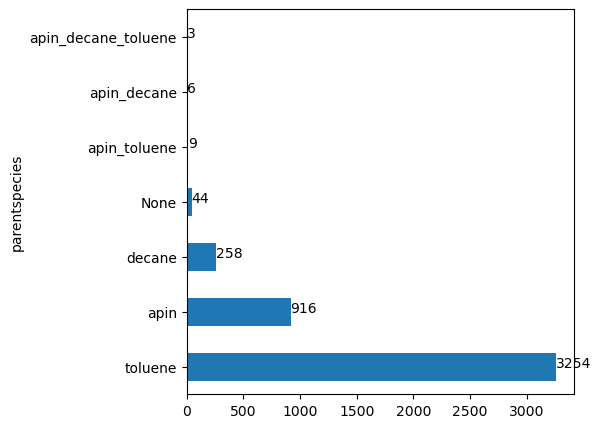

In [125]:

# Fill null values with 'None'
test['parentspecies'] = test['parentspecies'].fillna('None')

counts_test = test['parentspecies'].value_counts()
counts_test.plot(kind='barh', figsize=(5, 5))

for index, value in enumerate(counts_test):
    plt.text(value, index, str(value))

plt.show()

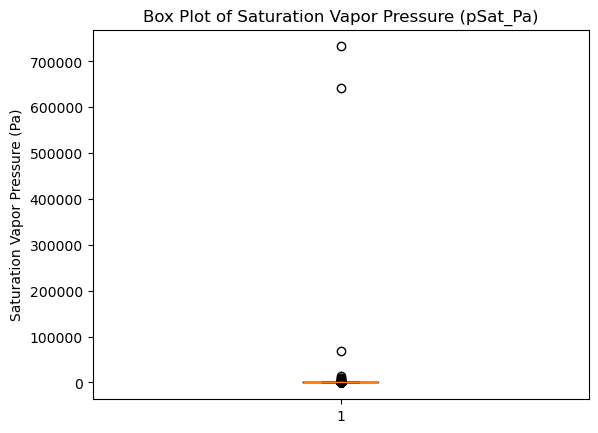

In [135]:
'''Let's look at some outliers'''

plt.boxplot(train['pSat_Pa'])
plt.title('Box Plot of Saturation Vapor Pressure (pSat_Pa)')
plt.ylabel('Saturation Vapor Pressure (Pa)')
plt.show()

In [136]:
'''Encoding the categorical variables and dropping outliers'''

# Encode the categorical column in the training data
train_encoded = pd.get_dummies(train, columns=['parentspecies'], drop_first=True)

# Calculate Z-scores for the 'pSat_Pa' column
z_scores = zscore(train_encoded['pSat_Pa'])

# Identify outlier indices
outlier_indices = (z_scores > 3) | (z_scores < -3)

# Remove outliers from the training data
train_encoded = train_encoded[~outlier_indices]

# Encode the categorical column in the test data
test_encoded = pd.get_dummies(test, columns=['parentspecies'], drop_first=True)

# Add missing columns in the test set
for column in train_encoded.columns:
    if column not in test_encoded.columns and column != 'pSat_Pa':
        test_encoded[column] = 0

# Align the columns in the test data with the train data
test_encoded = test_encoded.reindex(columns=train_encoded.drop('pSat_Pa', axis=1).columns, fill_value=0)



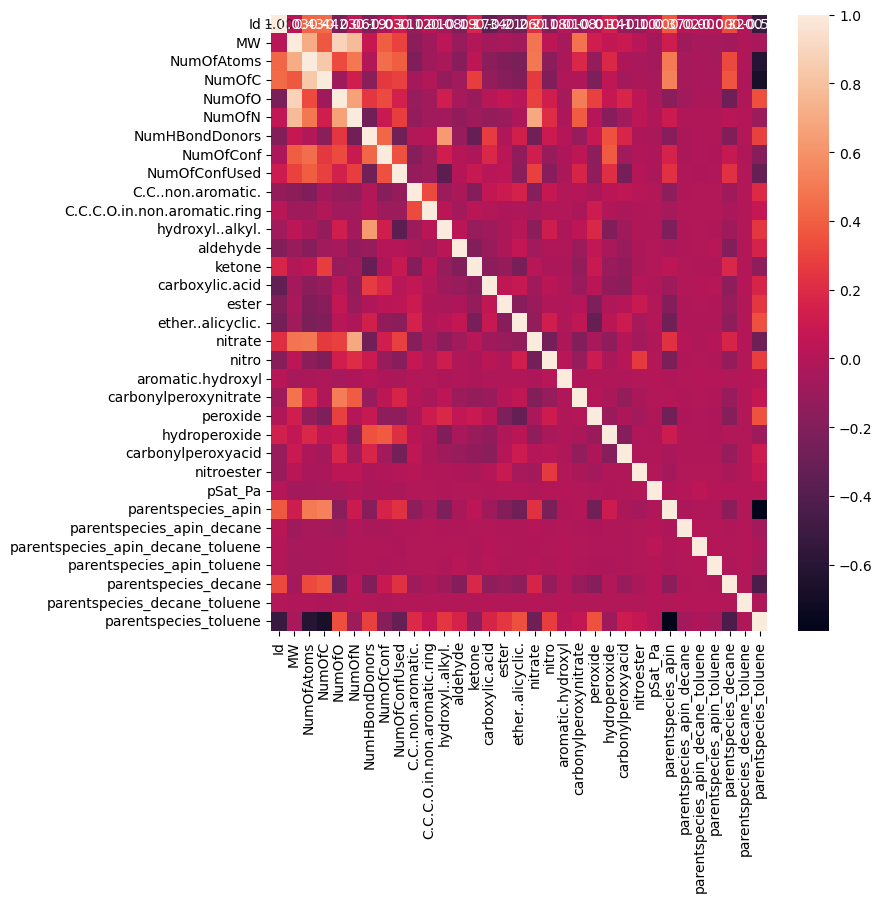

In [137]:
'''Create a correlation matrix'''

corr = train_encoded.corr()

# Generate a heatmap
plt.figure(figsize=(8, 8))
sns.heatmap(corr, annot=True, fmt=".2f")
plt.show()


In [144]:
'''Let's first do a simple linear regression to see what's what'''


# Separate features and target for training
X = train_encoded.drop('pSat_Pa', axis=1)
y = train_encoded['pSat_Pa']

# Test data is already prepared in X_test
X_test = test_encoded


X_train_new, X_val, y_train_new, y_val = train_test_split(X, y, test_size=0.2, random_state=1)

# model
model = LinearRegression()
model.fit(X_train_new, y_train_new)

y_pred = model.predict(X_val)

In [145]:
y_pred

array([  8.11039047,  -3.4896781 , -17.20808628, ...,  -6.965944  ,
         8.30403002, -15.23464554])

In [146]:
r2 = r2_score(y_val, y_pred)
mse = mean_squared_error(y_val, y_pred)

print(f"R2 Score: {r2}")
print(f"Mean Squared Error: {mse}")


R2 Score: 0.016624493401509288
Mean Squared Error: 23612.82464302131
